# Let the Modeling BEGIN!

__Overview of packages used__
- train_test_split splits our data into training and test sets
- RandomizedSearchCV looks over a dictionary for random combinations of hyperparameters that make our model perform the best
- preprocessing allows us to scale our data
- LogisticRegressionCV imports our logistic regression model
- DecisionTreeClassifier imports our decision tree classifier
- RandomForestClassifier imports our random forest
- model_selection allows us to cross validate our models
- numpy.random allows us to set random seeds that will produce the same results over multiple iterations
- warnings suppresses any future warnings 

In [87]:
from sklearn.model_selection import train_test_split# Splitting data between the training and testing set
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as model_selection
import numpy.random as nr
#suppress future/convergence/dataconversion warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

So, there is a lot going on in this section, primarily creating models based on cross-validation or "hold out" techniques. I am going to start this process by importing all of the relevent packages and models that I am going to use. From there I will perform model creation based on two different processes, train_test_split and cross validation. 
- First, I am going to dummy code our categorical columns with the pandas.get_dummies() function to make them into numbers, an overview of dummy coding can be found here https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
- Next, I am going to scale the features so that the numeric features will all be on the same scale, a good article on scaling can be found here https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/
- After scaling, I am going to perform a train_test_split for the first two models (LogisticRegressionCV and DecisionTree), the train_test_split makes the training data into two sets, a training set and a test set. 70% of the data is used to train on and the other 30% is used to test the model on to see its performance metrics.
- Once I have split the data into training and test sets, I can begin assessing the performance of our models

__The LogisticRegressionCV and DecisionTreeClassifier models use the train_test_split method so that I can compare this method with cross validation used in the RandomForest model__

Now that I have covered the train_test_split portion of this model selection piece, I want to explain how I modeled one of the RandomForestClassifiers. I created this model based on cross-validation rather than the train_test_split. In addition, I used nested cross-validation to estimate the optimum hyperparameters for the model.
- (taken from edX Principles of Machine Learning class, give gredit where it is due) K-fold Cross validation is a widely used resampling method. In cross validation a dataset is divided into k folds. Each fold contains  1𝑘  cases and is created by Bernoulli random sampling of the full data set. A computation is performed on  𝑘−1  folds of the full dataset. The  𝑘𝑡ℎ  fold is held back and is used for testing the result. The computation is performed  𝑘  times and model parameters are averaged (mean taken) over the results of the  𝑘  folds. For each iteration,  𝑘−1  folds are used for training and the  𝑘𝑡ℎ  fold is used for testing.
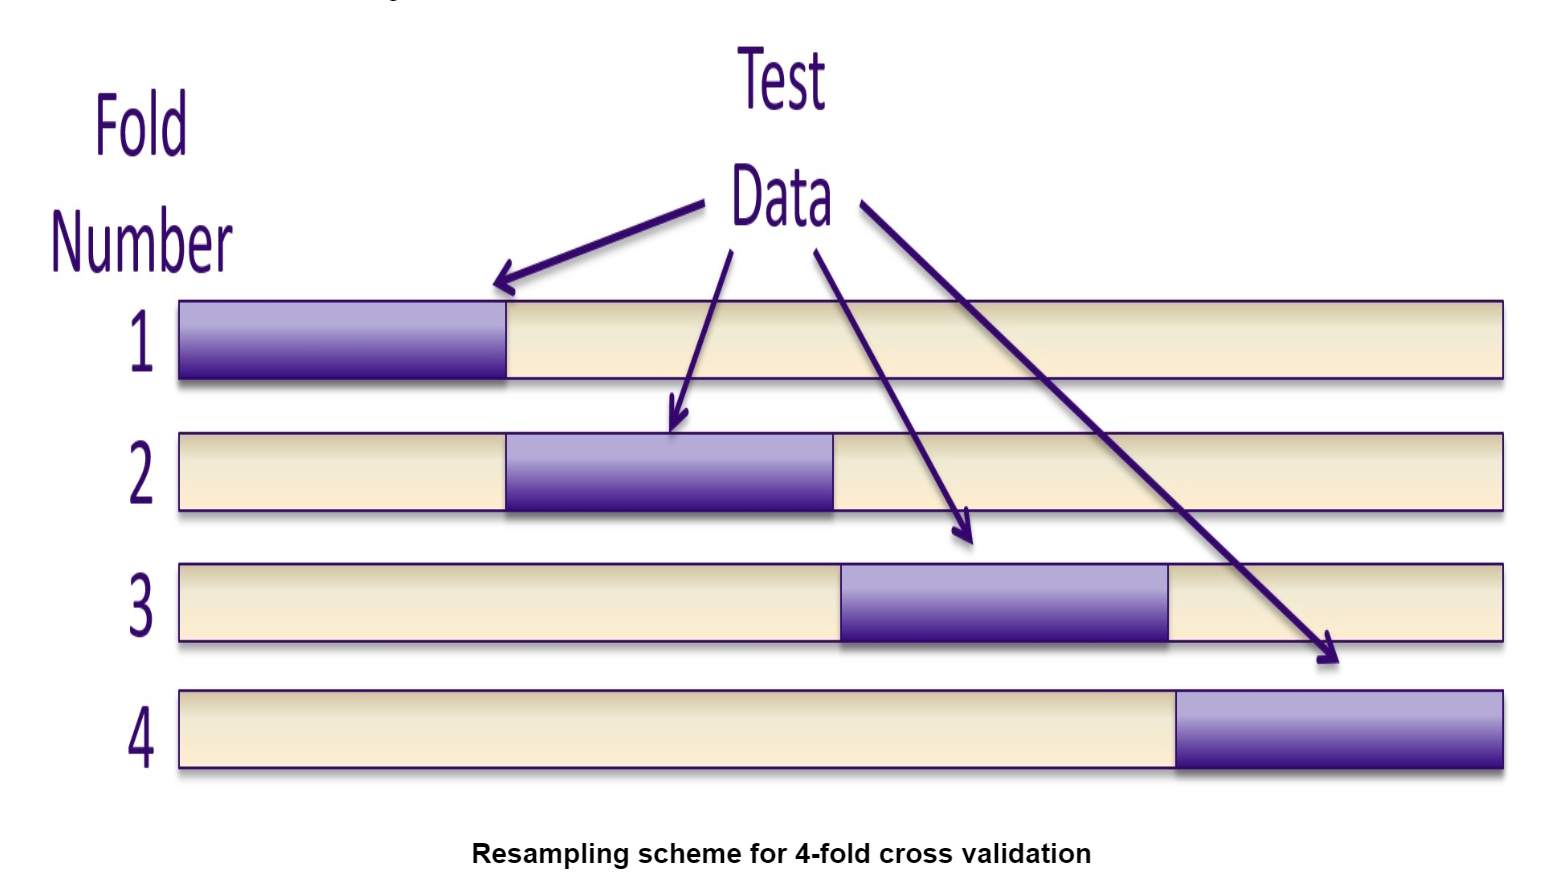

# Optimize hyperparameters with nested cross validation
(taken from the Principles of Machine Learning edX course, give credit where it is due)
Given the variability observed in cross validation, it should be clear that performing model selection from a single training and evaluation can be misleading. Fortunately, the nested cross validation approach provides a better way to perform model selection. However, there is no guarantee that a model selection process will, in fact, improve a model. In some cases, it may prove to be that model selection has minimal impact.

To start the nested cross validation process it is necessary to define the randomly sampled folds for the inner and outer loops. The shuffle = True argument specifies that a random shuffle is preformed before folds are created, ensuring that the sampling of the folds for the inside and outside loops are independent. Notice that by creating these independent fold objects there is no need to actually create nested loops for this process.

I am going to be sweeping the hyperparameters of max_features and min_samples_leaf for the random forest, the definitions of these can be found in the documentation link provided above the RandomForest model section



In [18]:
train.columns

Index(['date_recorded', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'district_code', 'lga', 'population',
       'public_meeting', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'management', 'payment', 'water_quality', 'quantity',
       'source', 'waterpoint_type', 'status_group'],
      dtype='object')

In [19]:
train.shape
test.shape

(59400, 23)

(14850, 22)

In [20]:
# Handling categorical variables by dummy coding 
# This means making each category its own column with a binary flag
df = pd.get_dummies(train, columns=['date_recorded','funder', 'installer', 'basin', 'region', 'lga',
                                   'public_meeting', 'scheme_name', 'permit', 'extraction_type',
                                   'management', 'payment', 'water_quality', 'quantity', 'source', 
                                   'waterpoint_type'], drop_first=False)



In [21]:
# Converting the class, an ordinal variable, into numbers
class_mapper = {'non functional': 0, 'functional needs repair': 1, 'functional': 2}
df['status_group'].replace(class_mapper, inplace=True)

In [22]:
df.shape

(59400, 3300)

In [23]:
# Assigning the features and labels to variables before splitting them
features = df.drop('status_group', axis=1)
label = df['status_group']

#scale the features
scale = preprocessing.StandardScaler()
scale.fit(features)
features = scale.transform(features)
features

# Splitting the observations into a training and a testing set for the holdout method

X_train, X_test, y_train, y_test = train_test_split(features, label,
                                                    test_size=0.30, random_state=46)



C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



StandardScaler(copy=True, with_mean=True, with_std=True)

C:\Users\Sam Cannon\Python\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



array([[ 0.87273927, -0.08115535, -1.40879062, ..., -0.64595294,
        -0.11565115, -0.34688896],
       [ 0.88953225, -0.17429499,  1.20793411, ..., -0.64595294,
        -0.11565115, -0.34688896],
       [-0.44084517,  0.90056329,  0.63975146, ..., -0.64595294,
        -0.11565115, -0.34688896],
       ...,
       [ 0.17303165, -0.43958657, -1.03340379, ...,  1.54810039,
        -0.11565115, -0.34688896],
       [-0.03221592,  0.27813862, -0.22828986, ...,  1.54810039,
        -0.11565115, -0.34688896],
       [-1.36445924,  1.15095135, -0.35350768, ...,  1.54810039,
        -0.11565115, -0.34688896]])

# First Model - Multiclass/Multinomial Logistic Regression

Here I am going to begin by using LogisticRegressionCV. The reason I am using this model is becuase logistic regression is a great base model to begin looking at predictions with. In addition, this model is different from LogisticRegression(no CV) in that it has cross validation built into the model that searches a grid of the best hyperparameters and selects them for the best performing model, documentation can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV

In [103]:
clf = LogisticRegressionCV(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_test, y_test)
clf.predict(X_test)
clf.score(X_test, y_test)

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

C:\U

array([0, 2, 2, ..., 2, 0, 2], dtype=int64)

0.8118967452300786

The accuracy of this model is high, but when submitted to the competition it scored around 75%, so this may suggest that I simply got a "good fold" for the train/test split. Even after using the embedded cross validation for optimum hyperparameters, the accuracy score did not give me a good idea of how this model would perform on new data. This is a great example of where cross validation would give a more "accurate" idea of how the model will perform, I will be using nested cross validation in the first Random Forest Classifier

# Second Model - Decision Tree
There are several advantages to using decision trees, but I want to mention 4 
- Decision trees implicitly perform variable screening or feature selection
- Decision trees require relatively little effort from users for data preparation
- Nonlinear relationships between parameters do not affect tree performance
- The best feature of using trees for analytics - easy to interpret and explain to executives

I wanted to use this model becuase of these reasons, and also becuase I wanted to see if one decision tree might perform well enough to preclude the need to continue to ensemble methods combining many trees or "weak learners" to create one strong model. As it turns out, this decision tree (which was not created using cross validation) performed reasonable well on its own, which leaves one wondering how well an ensemble method with many of them might perform?!

Here is the Scikit-Learn documentation for a DecisionTreeClassifier - https://scikit-learn.org/stable/modules/tree.html

In [104]:
# Instantiating the model
decision_tree_model = DecisionTreeClassifier()

# Fitting the model 
decision_tree_model.fit(X_train, y_train)


# Calculating the accuracy of our model
# Using model.score() since this will product the accuracy by default
accuracy = decision_tree_model.score(X_test, y_test)

# Reporting the accuracy
print('Accuracy:', accuracy)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Accuracy: 0.7528619528619529


# Third Model - Tuned Random Forest with Nested Cross-Validation Using RandomizedSearchCV

To quench the insatiable thirst for a better performing model, I decided to move on to ensemble methods...

As mentioned earler, nested cross-validation for hyperparameter tuning is a great method for getting a clear and accurate picture of what your model can actually do. This is also a way to ensure that I train the model based on the scoring metrics that I feel are most important. Becuase of the class imbalance, less than 10% of our labels were "functional needs repair" pumps, the accuracy of the model could be a misleading metric. Theoretically, the model could ignore this label class entirely and still be 90% accurate, weird...I know, and kindve distrubring, but no fear! I have used the F1 score that will create a balance between precision and recall and give the best opportunity for the model to perform well across classes. 
- Becuase there are smarter people than me who are better at writing about such things, I have attached a great article discussing the merit of using precision, recall, or f1 scores https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
- Here is a great article discussing what an f1 score actually is if you would like to geek out on some mathematical concepts https://mikulskibartosz.name/f1-score-explained-d94ee90dec5b
- I want to mention that the choice of the hyperparameter of n_estimators = 1000 (the number of decision trees used) was determined through trial and error. The model's performance was looked at from 100 trees to 10,000 trees and the 1000 tree mark provided the best performance 

- I am going to be sweeping over the hyperparameters of max_features to determine the maximum number of features to use for the model and min_samples_leaf which specifies the minimum number of samples required to be at a leaf node.

Here is the Scikit-Learn Documentation for a RandomForestClassifier - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

__Fun Fact: this took 56 hours to run :)__

In [30]:
# this defines the inner cross-validation
nr.seed(123)
inside2 = model_selection.KFold(n_splits=3, shuffle = True)

#this defines outer cross-validation
nr.seed(321)
outside2 = model_selection.KFold(n_splits=3, shuffle = True)

In [33]:
 #Instantiating the model (I tried with n_estimators=100 and 1000, 1000 was a little better)
rf_clf2 = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state = 46, class_weight='balanced')

## Define the dictionary for the grid search and the model object to search on
param_grid = {"max_features": list(range(1, 3300, 25)), "min_samples_leaf":list(range(1, 1000, 25))}

scoring = {'acc': 'accuracy',
           'f1_macro': 'f1_macro'}

## Perform the grid search over the parameters
nr.seed(4455)
rf_clf2 = model_selection.RandomizedSearchCV(estimator = rf_clf2, param_distributions = param_grid, 
                      cv = inside2, # Use the inside folds
                      scoring = 'f1_macro',
                      return_train_score = True)

rf_clf2.fit(features, label)
print(rf_clf2.best_estimator_.max_features)
print(rf_clf2.best_estimator_.min_samples_leaf)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
          error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False, random_state=46,
            verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_features': [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 301, 326, 351, 376, 401, 426, 451, 476, 501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776, 801, 826, 851, 876, 901, 926, 951, 976, 1001, 1026, 1051, 1076, 1101, 1126, 1151, 1176, 1201, 1226, 1251, 1...501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776

3076
1


In [36]:
nr.seed(498)
cv_estimate3 = model_selection.cross_val_score(rf_clf2, features, label, 
                                 cv = outside2) # Use the outside folds

print('Mean F1 = %4.3f' % np.mean(cv_estimate3))
print('SDT of F1       = %4.3f' % np.std(cv_estimate3))
print('F1 by cv fold')
for i, x in enumerate(cv_estimate3):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean F1 = 0.662
SDT of F1       = 0.038
F1 by cv fold
Fold  1    0.687
Fold  2    0.608
Fold  3    0.692


In [40]:
#create final cross validation fold for best parameters
#this defines outer cross-validation
nr.seed(45678)
final2 = model_selection.KFold(n_splits=3, shuffle = True)

In [41]:
nr.seed(1115)
rf_clf_best_params2 = RandomForestClassifier(class_weight = "balanced", 
                                max_features = rf_clf2.best_estimator_.max_features, 
                                min_samples_leaf = rf_clf2.best_estimator_.min_samples_leaf) 
rf_clf_best_params2.fit(features, label)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=3076,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [43]:
cv_estimate4 = model_selection.cross_val_score(rf_clf_best_params2, features, label, 
                                 cv = final2) # Use the final folds

print('Mean F1 = %4.3f' % np.mean(cv_estimate4))
print('SDT of F1       = %4.3f' % np.std(cv_estimate4))
print('F1 by cv fold')
for i, x in enumerate(cv_estimate4):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean F1 = 0.785
SDT of F1       = 0.002
F1 by cv fold
Fold  1    0.782
Fold  2    0.786
Fold  3    0.786


# Fourth Model - RandomSearchCV Default Random Forest

To demonstrate how the performance of a RandomForest with only 10 trees (the default parameter) differs from the performance of our previous model with 1000 trees, I went ahead and completed a model for you here! You can see that it kinda sucks compared to our 1000 tree model :(

In [ ]:
# this defines the inner cross-validation
nr.seed(123)
inside = model_selection.KFold(n_splits=3, shuffle = True)

#this defines outer cross-validation
nr.seed(321)
outside = model_selection.KFold(n_splits=3, shuffle = True)

In [46]:
#n_estimator default is 10 
rf_clf = RandomForestClassifier(n_jobs = 2, random_state = 46, class_weight = 'balanced')

## Define the dictionary for the grid search and the model object to search on
param_grid = {"max_features": list(range(1, 3300, 1)), "min_samples_leaf": list(range(1, 2000, 1))}

#Define scoring metrics 

scoring = {'acc': 'accuracy',
           'f1_macro': 'f1_macro'}

## Perform the grid search over the parameters
nr.seed(4455)
rf_clf = model_selection.RandomizedSearchCV(estimator = rf_clf, param_distributions = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'f1_macro',
                      return_train_score = True)

rf_clf.fit(features, label)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.min_samples_leaf)


C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Sam Cannon\Python\lib\site-pack

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
          error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,...83, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 

3290
194


In [47]:
nr.seed(498)
cv_estimate = model_selection.cross_val_score(rf_clf, features, label, 
                                 cv = outside) #use outside folds 

print('Mean F1 = %4.3f' % np.mean(cv_estimate))
print('SDT of F1       = %4.3f' % np.std(cv_estimate))
print('F1 by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Sam Cannon\Python\lib\site-pack

Mean F1 = 0.580
SDT of F1       = 0.023
F1 by cv fold
Fold  1    0.566
Fold  2    0.586
Fold  3    0.592
Fold  4    0.544
Fold  5    0.611


In [48]:
#create final cross validation fold for best parameters
#this defines outer cross-validation
nr.seed(45678)
final = model_selection.KFold(n_splits=5, shuffle = True)

In [49]:
nr.seed(1115)
rf_clf_best_params = RandomForestClassifier(class_weight = "balanced", 
                                max_features = rf_clf.best_estimator_.max_features, 
                                min_samples_leaf = rf_clf.best_estimator_.min_samples_leaf) 
rf_clf_best_params.fit(features, label)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=3290,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=194,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [77]:
cv_estimate2 = model_selection.cross_val_score(rf_clf_best_params, features, label, 
                                 cv = final) # Use the outside folds

print('Mean F1 = %4.3f' % np.mean(cv_estimate2))
print('SDT of F1       = %4.3f' % np.std(cv_estimate2))
print('F1 by cv fold')
for i, x in enumerate(cv_estimate2):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean F1 = 0.650
SDT of F1       = 0.006
F1 by cv fold
Fold  1    0.660
Fold  2    0.645
Fold  3    0.654
Fold  4    0.643
Fold  5    0.650


# Fifth Model - Random Forest - No Nested Cross Validation - Hold onto your seats, this is where things get a little weird

So...this is actually the model that scored the highest in the competition out of our models that I submitted, but there was no cross validation used in this model other than to evaluate it at the end, really interesting

In [110]:
from sklearn.ensemble import RandomForestClassifier

# Instantiating the model (I tried with n_estimators=100 and 1000, 1000 was a little better)
#should not that I didn't scale features the first submission, scaled for the second
#I tuned this model, so everythin after n_estimators is new to the fourth submission of this model

rf_clf3 = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state = 46)


rf_clf3.fit(X_train, y_train)

# Calculating the accuracy of our model
# Using model.score() since this will produce the accuracy by default
accuracy = rf_clf3.score(X_test, y_test)


# Reporting the accuracy
print('Accuracy:', accuracy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=46, verbose=0, warm_start=False)

Accuracy: 0.796408529741863


In [111]:
#this defines the cross-validation
nr.seed(123)
cross_validation = model_selection.KFold(n_splits=5, shuffle = True)

In [112]:
nr.seed(777)
cv_estimate2 = model_selection.cross_val_score(rf_clf3, X_test, y_test, 
                                 cv = cross_validation)

print('Mean accuracy = %4.3f' % np.mean(cv_estimate2))
print('SDT of accuracy       = %4.3f' % np.std(cv_estimate2))
print('Accuracy by cv fold')
for i, x in enumerate(cv_estimate2):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean accuracy = 0.780
SDT of accuracy       = 0.006
Accuracy by cv fold
Fold  1    0.788
Fold  2    0.782
Fold  3    0.781
Fold  4    0.768
Fold  5    0.779


In [113]:
#turn the training set into a data frame to check feature importance
xtraindf = pd.DataFrame(X_train)

In [114]:
#check feature importance
feature_importances = pd.DataFrame(rf_clf3.feature_importances_,
                                   index = xtraindf.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [115]:
feature_importances
#looks like longitude, latitude, gps_height, water_quality_unknown, population and construction_year are the top ones

,importance
1,0.099082
2,0.098841
0,0.055943
3277,0.049453
4,0.039326
5,0.038553
3278,0.026755
3298,0.022148
3241,0.020399
3262,0.013073


In [116]:
df.head()

gps_height  longitude   latitude  district_code  population  \
0        1390  34.938093  -9.856322              5    4.691348   
1        1399  34.698766  -2.147466              2    5.634790   
2         686  37.460664  -3.821329              4    5.521461   
3         263  38.486161 -11.155298             63    4.060443   
4         518  31.130847  -1.825359              1    1.609438   

   construction_year  status_group  date_recorded_1/1/2013  \
0               1999             2                       0   
1               2010             2                       0   
2               2009             2                       0   
3               1986             0                       0   
4               1990             2                       0   

   date_recorded_1/10/2013  date_recorded_1/11/2013  date_recorded_1/12/2013  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   date_recorded_1/13/2013  date_recorded_1/14/2013  date_recorded_1/15/2013  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   date_recorded_1/16/2013  date_recorded_1/17/2013  date_recorded_1/18/2013  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   date_recorded_1/19/2013  date_recorded_1/20/2013  date_recorded_1/21/2012  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   date_recorded_1/21/2013  date_recorded_1/22/2013  date_recorded_1/23/2013  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   date_recorded_1/24/2013  date_recorded_1/25/2012  date_recorded_1/25/2013  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   date_recorded_1/26/2013  date_recorded_1/27/2013  date_recorded_1/28/2013  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0 

# Shaping New Data for Predictions
To get the predictions data prepared to predict new labels, I need to shape it the same exact ways that I handled the training data, the following steps are the same that I went through with the training data

In [51]:
#dummy test
test_dummies = pd.get_dummies(test, columns=['date_recorded','funder', 'installer', 'basin', 'region', 'lga', 
                                   'public_meeting', 'scheme_name', 'permit', 'extraction_type',
                                   'management', 'payment', 'water_quality', 'quantity', 'source', 
                                   'waterpoint_type'], drop_first=False)


In [52]:
df.shape

(59400, 3300)

In [53]:
test_dummies.shape

(14850, 2366)

In [54]:
test_features = np.array(test_dummies)

In [55]:
test_features.shape

(14850, 2366)

Notice that the shape of the test set is different than the training set, these both have to be the exact same due to the way that the model was trained, so I need to add all of the columns to the test set with this code (not all unique values might be in the training set)

In [56]:
# Get missing columns in the training test
missing_cols = set( df.columns ) - set( test_dummies.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_dummies[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test = test_dummies[df.columns]

In [57]:
test.shape

(14850, 3300)

In [58]:
#need to drop the labels from the test set
test.drop('status_group', axis=1, inplace=True)

In [59]:
#scaler has already been fit to our training set, you should not fit it to our test set, simply transform with the same scale
test_features = scale.transform(test)
test_features

C:\Users\Sam Cannon\Python\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



array([[ 2.00346679,  0.05610874,  0.55883891, ..., -0.64595294,
        -0.11565115,  2.88276687],
       [ 1.20673304,  0.58768492,  0.81358556, ..., -0.64595294,
        -0.11565115, -0.34688896],
       [ 1.20300127, -0.14740424,  0.23818386, ..., -0.64595294,
        -0.11565115,  2.88276687],
       ...,
       [ 1.03320555, -0.15832393,  0.38032864, ..., -0.64595294,
        -0.11565115, -0.34688896],
       [ 0.14131157,  0.11134513, -1.65585047, ..., -0.64595294,
        -0.11565115, -0.34688896],
       [-0.82335201, -0.1484973 , -1.8737237 , ..., -0.64595294,
        -0.11565115, -0.34688896]])

# Predicting New Data with Fit Models
All I am doing here is creating a data frame that I can export to a csv file with the new predictions

In [60]:
rf_predictions = rf_clf_best_params2.predict(test_features)

In [61]:
rf_predictions

array([2, 2, 2, ..., 2, 2, 0], dtype=int64)

In [62]:
len(rf_predictions)

14850

In [63]:
test_predictionsdf = pd.DataFrame(data=rf_predictions)

In [64]:
test_predictionsdf[0] = test_predictionsdf[0].map({0:'non functional', 1:'functional needs repair', 2:'functional'})

In [65]:
test_predictionsdf.to_csv('Tanzania_submission_13.csv')

In [132]:
logistic_predictions = clf.predict(test_features)

In [133]:
logistic_predictions

array([0, 2, 0, ..., 2, 2, 0], dtype=int64)

In [134]:
logistic_predictionsdf = pd.DataFrame(data=logistic_predictions)

In [135]:
logistic_predictionsdf[0] = logistic_predictionsdf[0].map({0:'non functional', 1:'functional needs repair',
                                                           2:'functional'})

In [136]:
logistic_predictionsdf.to_csv('tanzania_log_predictions2.csv')

# Here is a list of the different ways I tried running the model and their corresponding accuracy scores

In [140]:
#score and accuracy are differenet BTW
#ran the model imputing for gps_height with no scaling - score: .8035
#ran the same model with scaling - score: .8075
#ran the model with no imputation for gps_height - score: .8074
#ran the model with amount_tsh imputed mean value: accuracy was terrible
#ran the model without all geographic info besides long and lat and without imputing mean for gps_height: score .8058
#ran it with imputing gps_height mean, same exact score
#ran with basin back in but with no other geographic info (besides long lat): Accuracy: 0.7943322109988776
#put all the geo information back in: Accuracy: 0.7960157126823794, score: .8071 (same model as the .8075 score, interestin)
#ran the model imputing the median of population, construction_year, and gps_height instead of the mean: 
    # Accuracy: 0.7964646464646464, SCORE: .8086!! median is better then
#ran the model with the imputed median value of amount_tsh along with the imputed means used in the previous 
    #model : Accuracy: 0.7956790123456791, accuracy is less than leaving it out should just delete amount_tsh
    #although the decision tree accuracy goes up here, really interesting
#next, I want to run this with the logarith of numeric features